In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn .svm import SVC
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import accuracy_score,classification_report

In [2]:
df=pd.read_csv('mushroom.csv')

In [3]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [4]:
labelencoder=LabelEncoder()

In [5]:
for columns in df.columns:
    df[columns]=labelencoder.fit_transform(df[columns])

In [6]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,889,4,2,7,0,1,1,2,0,7,...,0,0,2,6,3,1,5,1,916,190
1,786,4,0,6,0,1,3,1,1,3,...,1,0,2,6,1,2,5,0,128,750
2,246,3,1,5,1,4,1,1,0,8,...,1,3,2,6,6,0,5,1,537,281
3,221,0,2,4,1,3,3,0,0,6,...,0,3,2,0,4,1,0,1,234,829
4,630,3,3,8,1,5,2,1,1,6,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,0,1,1,2,6,0,1,1,283,680
1996,885,4,2,5,1,5,0,2,1,9,...,0,2,1,7,8,2,5,1,335,521
1997,205,2,1,3,1,3,3,0,1,7,...,0,0,2,1,8,0,6,1,859,438
1998,329,0,3,7,0,7,2,0,1,6,...,1,3,1,0,1,5,6,1,679,320


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Unnamed: 0                2000 non-null   int64
 1   cap_shape                 2000 non-null   int32
 2   cap_surface               2000 non-null   int32
 3   cap_color                 2000 non-null   int32
 4   bruises                   2000 non-null   int32
 5   odor                      2000 non-null   int32
 6   gill_attachment           2000 non-null   int32
 7   gill_spacing              2000 non-null   int32
 8   gill_size                 2000 non-null   int32
 9   gill_color                2000 non-null   int32
 10  stalk_shape               2000 non-null   int32
 11  stalk_root                2000 non-null   int32
 12  stalk_surface_above_ring  2000 non-null   int32
 13  stalk_surface_below_ring  2000 non-null   int32
 14  stalk_color_above_ring    2000 non-null 

In [8]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
import seaborn as sns

<Axes: xlabel='stalk_height', ylabel='Count'>

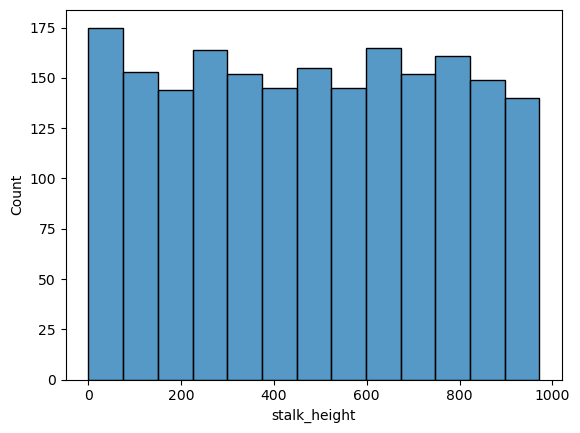

In [10]:
sns.histplot(df['stalk_height'])

<Axes: >

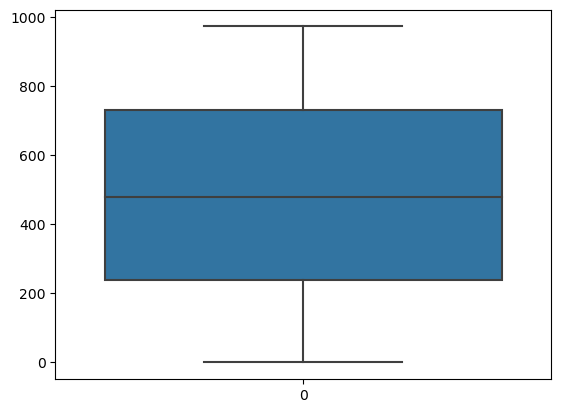

In [11]:
sns.boxplot(df['stalk_height'])

<Axes: ylabel='stalk_height'>

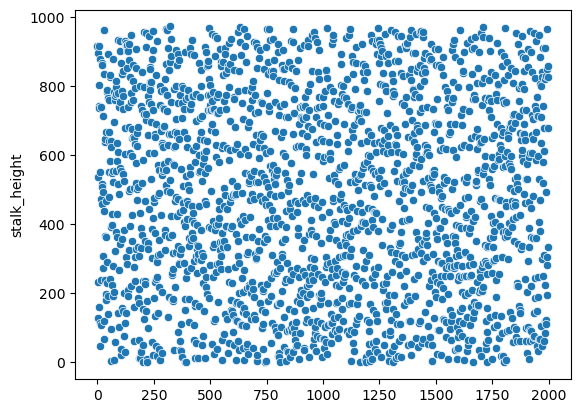

In [12]:
sns.scatterplot(df['stalk_height'])

<Axes: xlabel='cap_diameter', ylabel='Count'>

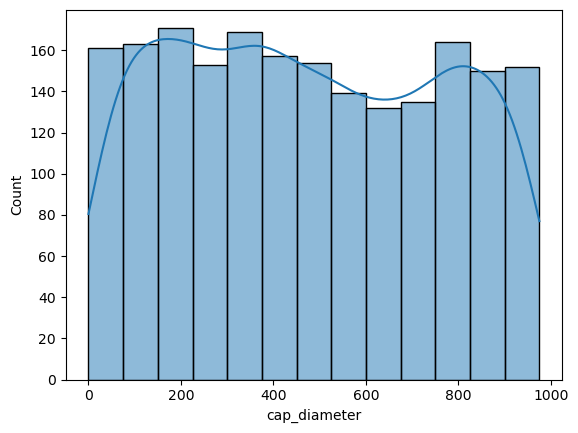

In [13]:
sns.histplot(df['cap_diameter'],kde=True)

<Axes: >

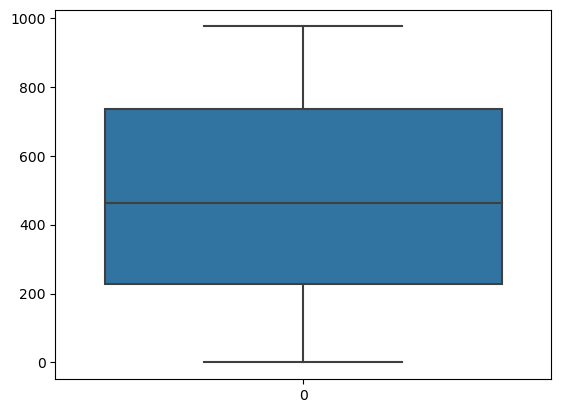

In [14]:
sns.boxplot(df['cap_diameter'])

<Axes: ylabel='cap_diameter'>

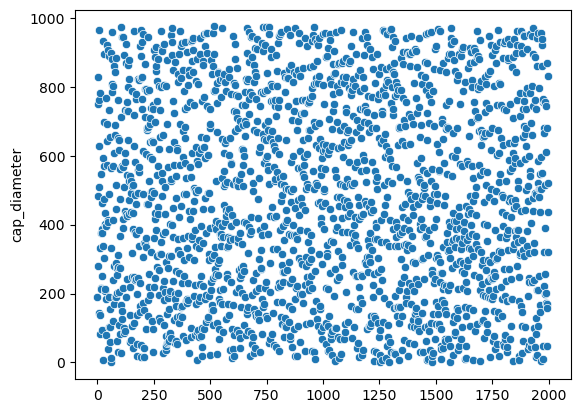

In [15]:
sns.scatterplot(df['cap_diameter'])

<Axes: xlabel='gill_color', ylabel='Count'>

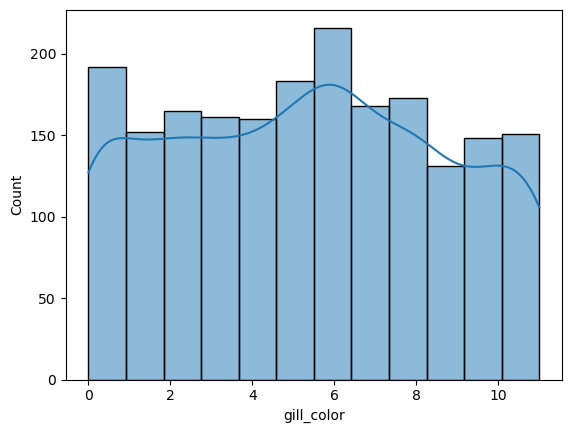

In [16]:
sns.histplot(df['gill_color'],kde=True)

<Axes: ylabel='gill_color'>

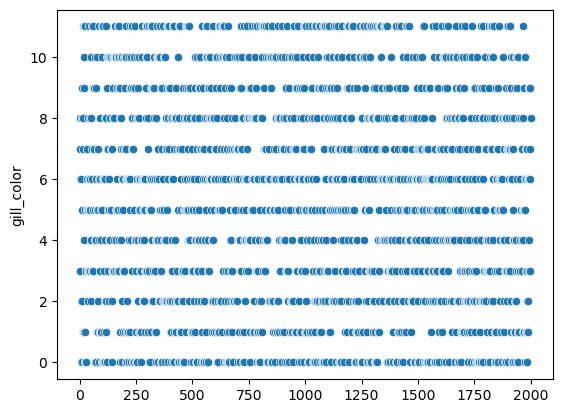

In [17]:
sns.scatterplot(df['gill_color'])

<Axes: >

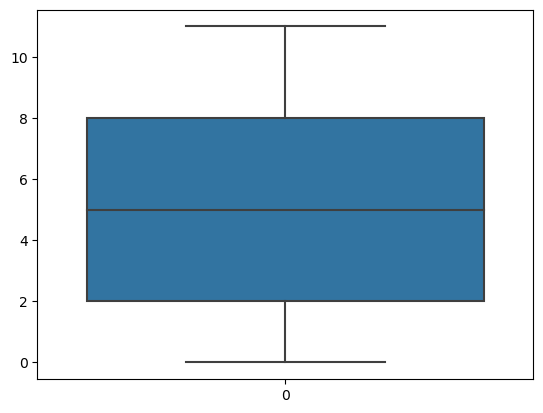

In [18]:
sns.boxplot(df['gill_color'])

In [19]:
df.corr()

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
Unnamed: 0,1.000000,0.075763,-0.018949,0.023832,-0.046098,-0.012166,-0.005352,0.047559,-0.022678,0.038787,...,0.019621,-0.049108,-0.066561,0.022132,-0.002575,0.020003,0.051963,0.005742,-0.001660,0.051861
cap_shape,0.075763,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.023586,0.038942
cap_surface,-0.018949,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043168,0.016084
cap_color,0.023832,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.043899,-0.000427
bruises,-0.046098,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.066449,-0.045774
odor,-0.012166,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.012637,-0.054402
gill_attachment,-0.005352,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.015984,-0.041098
gill_spacing,0.047559,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.014766,0.030303
gill_size,-0.022678,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.001054,-0.068738
gill_color,0.038787,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026476,0.004822


In [20]:
X=df.drop(columns=['class'])

In [21]:
Y=df['class']

In [22]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [23]:
model=SVC(kernel='poly',C=1,random_state=42)


In [24]:
model.fit(x_train,y_train)

SVC(C=1, kernel='poly', random_state=42)

In [25]:
y_pred=model.predict(x_test)

In [26]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [27]:
classification_report=classification_report(y_test,y_pred)

In [28]:
classification_report

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       133\n           1       0.67      1.00      0.80       267\n\n    accuracy                           0.67       400\n   macro avg       0.33      0.50      0.40       400\nweighted avg       0.45      0.67      0.53       400\n'

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
confusion_matrix=confusion_matrix(y_test,y_pred)

In [31]:
confusion_matrix

array([[  0, 133],
       [  0, 267]], dtype=int64)

<Axes: >

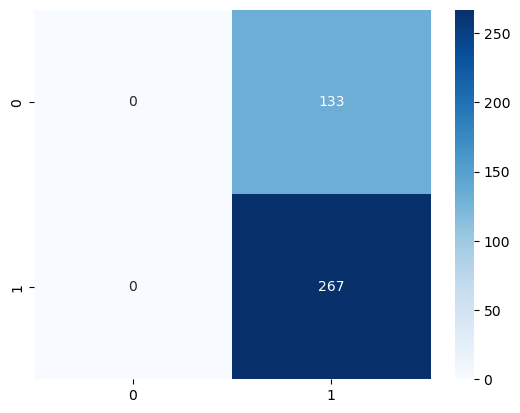

In [32]:
sns.heatmap(confusion_matrix,annot=True,cmap='Blues',fmt='d')